In [34]:
import pandas as pd
import glob
import os
from matplotlib import pyplot as plt

In [35]:
path = '/Users/farnoosh/Documents/DATA/UHN-Project/Genomic/Processed/HYPERPARAM/Bortezomib/test_tube_data/DeepCINET_ScalarOnlySiamese/'
#path = '/Users/farnoosh/Documents/DATA/Result2/HYPERPARAM/Bortezomib/test_tube_data/DeepCINET_ScalarOnlySiamese/'
#path = '/Users/farnoosh/Documents/DATA/UHN-Project/Genomic/Processed/HYPERPARAM_Archive_deepcinet/Bortezomib/test_tube_data/DeepCINET_ScalarOnlySiamese/'

results = pd.DataFrame()

for name in glob.glob(path + 'version*/metric*'):
    #print(os.path.getsize (name))
    if(os.path.getsize(name) > 1):
        result = pd.read_csv(name)
        results = pd.concat([results , result])
    
results.sort_values(by=['test'])


results = results.groupby(['learning_rate',  'regularization','mrmr_size', 'batch_size', 'model','num_epochs']).mean()
results[results['test']>0.85].sort_values('test').to_csv("a")
    
   


Erlotinib
Bortezomib
Doxorubicin
PLX4720
MK-2206
Nilotinib
Crizotinib
Vorinostat
Docetaxel
AZD7762
AZD8055
Dasatinib
Gemcitabine
Gefitinib
Methotrexate
TGX221


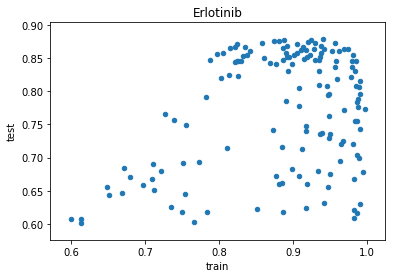

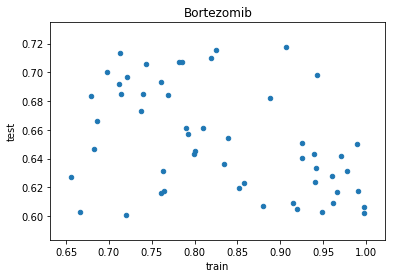

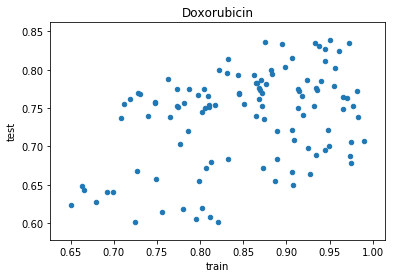

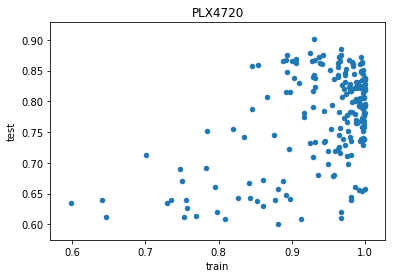

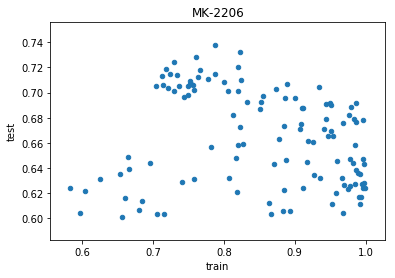

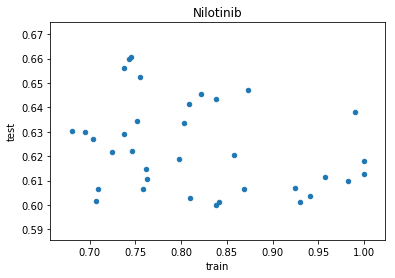

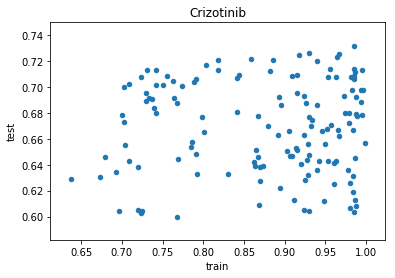

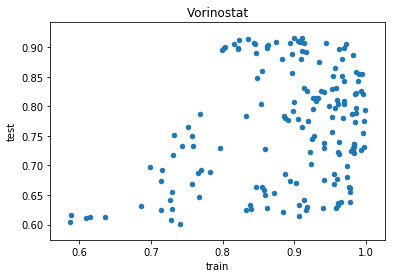

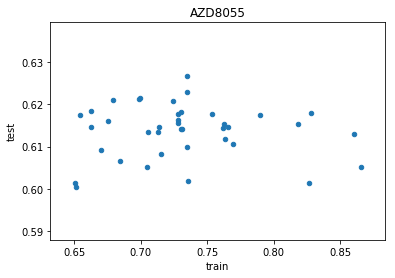

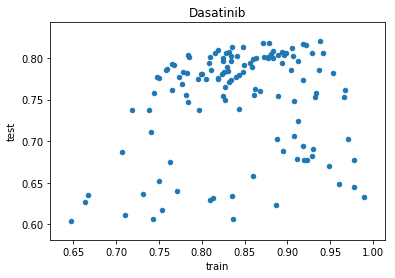

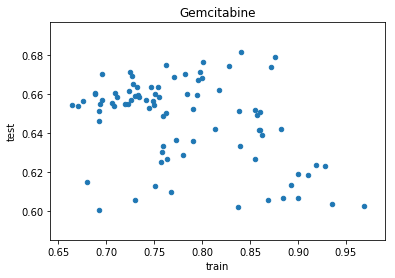

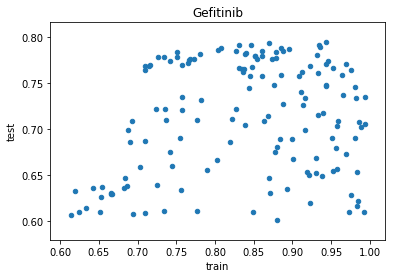

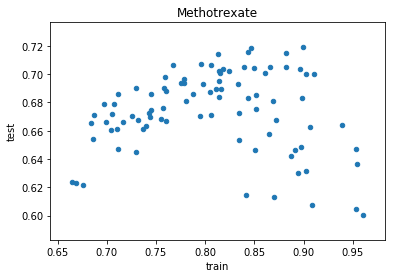

In [36]:
all_results = pd.DataFrame()
for drug in ['Erlotinib' , 'Bortezomib','Doxorubicin' , 'PLX4720',
            'MK-2206', 'Nilotinib', 'Crizotinib','Vorinostat',
             'Docetaxel','AZD7762', 'AZD8055','Dasatinib',
             'Gemcitabine','Gefitinib','Methotrexate','TGX221']:
        path = f'/Users/farnoosh/Documents/DATA/UHN-Project/Genomic/Processed/HYPERPARAM/{drug}/test_tube_data/DeepCINET_ScalarOnlySiamese/'
        try:
            results = pd.DataFrame()
            for name in glob.glob(path + 'version*/metric*'):
                #print(os.path.getsize (name))
                if(os.path.getsize (name) > 100):
                    result = pd.read_csv(name)
                    result['drug'] = drug
                    results = pd.concat([results , result])
                    all_results = pd.concat([all_results,result[result['test']>0.6]])
    
            results.sort_values(by=['test'])
            results = results.groupby(['learning_rate',  'regularization','mrmr_size', 'batch_size', 'model','num_epochs']).mean()
            results[results['test']>0.6].plot.scatter(x='train',y='test',title=drug)
            print(results[results['test']>0.6].sort_values(by=['test']).head(10))
        except:
            print(drug);

In [43]:
all_results.groupby(['drug','model']).mean().sort_values(by='test')

batch_size  cv_folds  dropout  full_summary  \
drug       model                                                             
Bortezomib ScalarOnlySiamese2       100.0       5.0      0.2         False   
Gefitinib  ScalarOnlySiamese2       100.0       5.0      0.2         False   
AZD8055    ScalarOnlySiamese1       100.0       5.0      0.2         False   
Erlotinib  ScalarOnlySiamese2       100.0       5.0      0.2         False   
AZD8055    ScalarOnlySiamese3       100.0       5.0      0.2         False   
...                                   ...       ...      ...           ...   
PLX4720    ScalarOnlySiamese4       100.0       5.0      0.2         False   
Vorinostat ScalarOnlySiamese        100.0       5.0      0.2         False   
           ScalarOnlySiamese1       100.0       5.0      0.2         False   
Erlotinib  ScalarOnlySiamese        100.0       5.0      0.2         False   
PLX4720    ScalarOnlySiamese1       100.0       5.0      0.2         False   

                               gpu_allow_growth  initial_seed  learning_rate  \
drug       model                                                               
Bortezomib ScalarOnlySiamese2              True      5.000000       0.000287   
Gefitinib  ScalarOnlySiamese2              True      3.000000       0.001000   
AZD8055    ScalarOnlySiamese1              True      3.222222       0.000300   
Erlotinib  ScalarOnlySiamese2              True      4.230769       0.000423   
AZD8055    ScalarOnlySiamese3              True      3.216216       0.000357   
...                                         ...           ...            ...   
PLX4720    ScalarOnlySiamese4              True      3.220379       0.001276   
Vorinostat ScalarOnlySiamese               True      3.357895       0.000836   
           ScalarOnlySiamese1              True      3.230769       0.000698   
Erlotinib  ScalarOnlySiamese               True      3.380117       0.000867   
PLX4720    ScalarOnlySiamese1              True      3.222488       0.001279   

                                  mixed  mrmr_size  num_epochs  ...     split  \
drug       model                                                ...             
Bortezomib ScalarOnlySiamese2  0.510637        0.0    6.208333  ...  5.000000   
Gefitinib  ScalarOnlySiamese2  0.536408        0.0    2.000000  ...  3.000000   
AZD8055    ScalarOnlySiamese1  0.587180        0.0    8.527778  ...  3.222222   
Erlotinib  ScalarOnlySiamese2  0.536973        0.0    5.538462  ...  4.230769   
AZD8055    ScalarOnlySiamese3  0.590759        0.0    7.972973  ...  3.216216   
...                                 ...        ...         ...  ...       ...   
PLX4720    ScalarOnlySiamese4  0.549693        0.0    6.082938  ...  3.220379   
Vorinostat ScalarOnlySiamese   0.618917        0.0    7.142105  ...  3.357895   
           ScalarOnlySiamese1  0.610869        0.0    6.838462  ...  3.230769   
Erlotinib  ScalarOnlySiamese   0.647425        0.0    6.836257  ...  3.380117   
PLX4720    ScalarOnlySiamese1  0.548705        0.0    6.815789  ...  3.222488   

                               split_number  split_seed  splitting_model  \
drug       model                                                           
Bortezomib ScalarOnlySiamese2      2.000000    5.000000              1.0   
Gefitinib  ScalarOnlySiamese2      1.000000    3.000000              1.0   
AZD8055    ScalarOnlySiamese1      0.916667    3.222222              1.0   
Erlotinib  ScalarOnlySiamese2      1.538462    4.230769              1.0   
AZD8055    ScalarOnlySiamese3      0.891892    3.216216              1.0   
...                                     ...         ...              ...   
PLX4720    ScalarOnlySiamese4      0.912322    3.220379              1.0   
Vorinostat ScalarOnlySiamese       1.036842    3.357895              1.0   
           ScalarOnlySiamese1      0.961538    3.230769              1.0   
Erlotinib  ScalarOnlySiamese       1.029240    3.380117              1.0   
PLX4720  

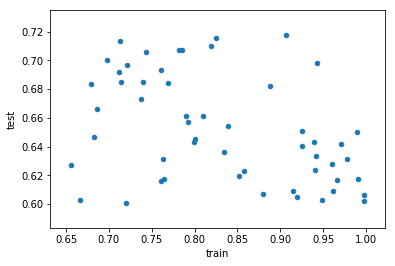

In [30]:
results[results['test']>0.6].plot.scatter(x='train',y='test')

In [31]:
results[results['test']>0.6].sort_values('test')

cv_folds  \
learning_rate regularization mrmr_size batch_size model              num_epochs             
0.0010        5.0            0         100        ScalarOnlySiamese3 5                5.0   
0.0001        0.5            0         100        ScalarOnlySiamese  12               5.0   
0.0010        3.0            0         100        ScalarOnlySiamese4 10               5.0   
0.0030        3.0            0         100        ScalarOnlySiamese3 5                5.0   
0.0001        5.0            0         100        ScalarOnlySiamese  10               5.0   
              0.5            0         100        ScalarOnlySiamese  10               5.0   
0.0010        4.0            0         100        ScalarOnlySiamese3 12               5.0   
              0.5            0         100        ScalarOnlySiamese3 2                5.0   
              5.0            0         100        ScalarOnlySiamese  8                5.0   
0.0003        5.0            0         100        ScalarOnlySiamese  5                5.0   
              0.5            0         100        ScalarOnlySiamese1 12               5.0   
              3.0            0         100        ScalarOnlySiamese3 4                5.0   
0.0010        0.5            0         100        ScalarOnlySiamese  10               5.0   
0.0003        5.0            0         100        ScalarOnlySiamese  10               5.0   
              3.0            0         100        ScalarOnlySiamese4 10               5.0   
              0.5            0         100        ScalarOnlySiamese1 10               5.0   
0.0010        3.0            0         100        ScalarOnlySiamese1 5                5.0   
              4.0            0         100        ScalarOnlySiamese4 5                5.0   
0.0030        3.0            0         100        ScalarOnlySiamese1 2                5.0   
0.0003        0.5            0         100        ScalarOnlySiamese  3                5.0   
0.0030        0.5            0         100        ScalarOnlySiamese  3                5.0   
              5.0            0         100        ScalarOnlySiamese  10               5.0   
              3.0            0         100        ScalarOnlySiamese3 12               5.0   
0.0010        3.0            0         100        ScalarOnlySiamese  12               5.0   
0.0030        0.5            0         100        ScalarOnlySiamese  5                5.0   
              5.0            0         100        ScalarOnlySiamese3 8                5.0   
                                                  ScalarOnlySiamese4 2                5.0   
0.0010        0.5            0         100        ScalarOnlySiamese  5                5.0   
0.0003        0.5            0         100        ScalarOnlySiamese  10               5.0   
0.0001        3.0            0         100        ScalarOnlySiamese4 10               5.0   
0.0030        3.0            0         100        ScalarOnlySiamese  2                5.0   
0.0010        3.0            0         100        ScalarOnlySiamese1 10               5.0   
              5.0            0         100        ScalarOnlySiamese1 10               5.0   
0.0003        5.0            0         100        ScalarOnlySiamese1 12               5.0   
0.0001        3.0            0         100        ScalarOnlySiamese1 12               5.0   
0.0010        0.5            0         100        ScalarOnlySiamese4 12               5.0   
0.0030        0.5            0         100        ScalarOnlySiamese3 5                5.0   
0.0003        3.0            0         100        ScalarOnlySiamese3 12               5.0   
0.0030        3.0            0         100        ScalarOnlySiamese4 2                5.0   
0.0010        4.0            0         100        ScalarOnlySiamese  5                5.0   
              5.0            0         100        ScalarOnlySiamese4 3                5.0   
0.0001        5.0            0         100        ScalarOnlySiamese3 10           

MK-2206
MK-2206


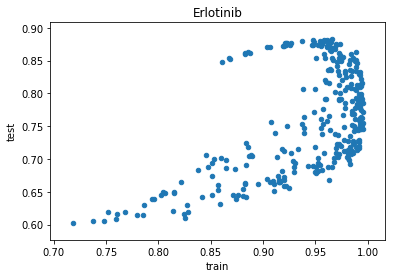

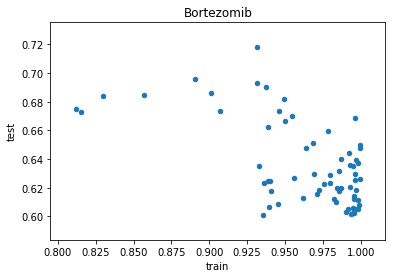

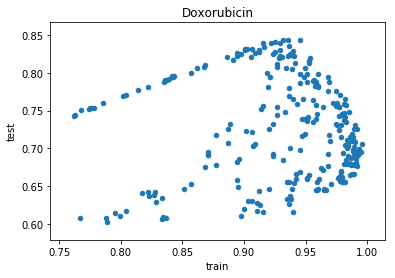

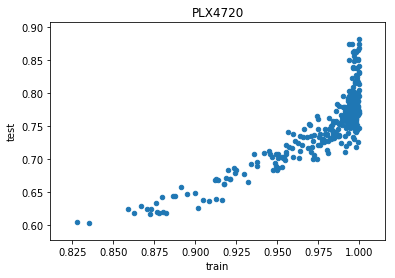

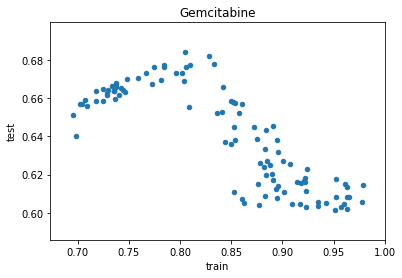

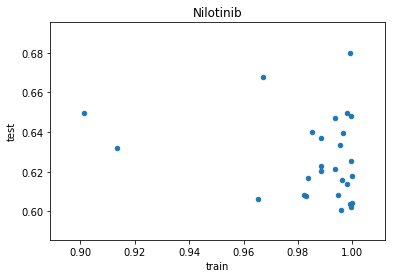

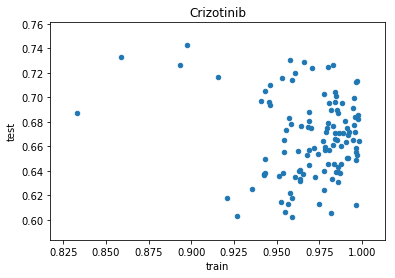

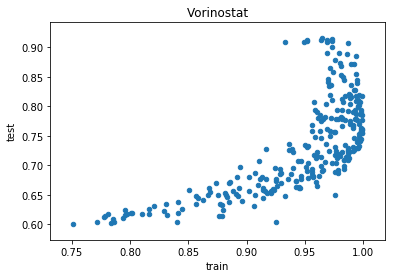

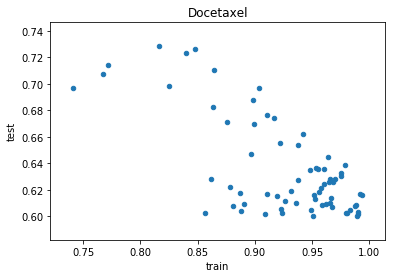

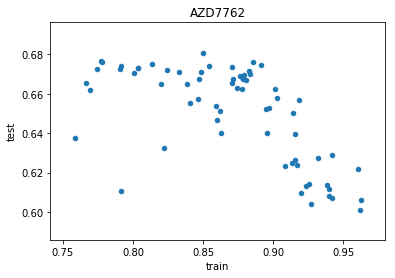

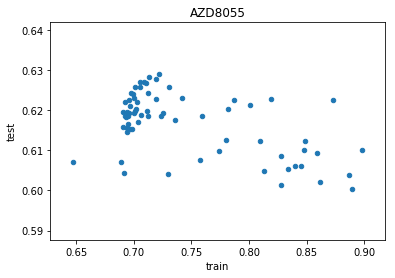

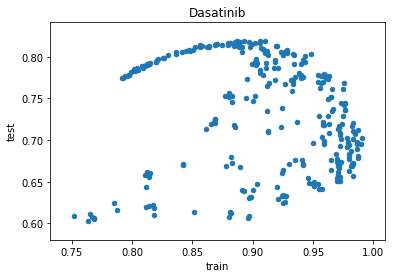

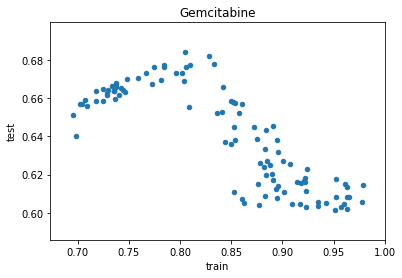

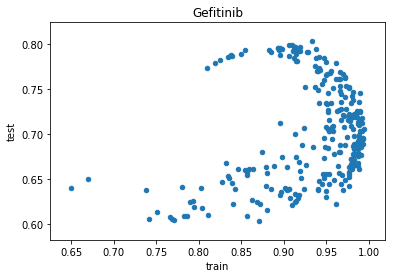

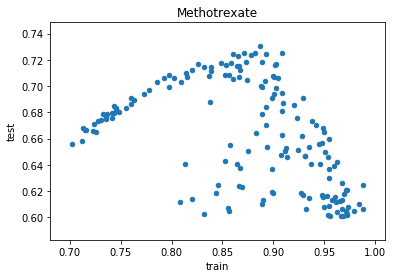

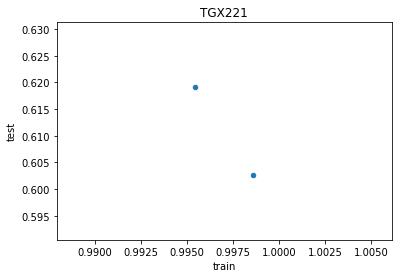

In [59]:
all_results = pd.DataFrame()
for drug in ['Erlotinib' , 'Bortezomib','Doxorubicin' , 'PLX4720',
            'MK-2206', 'Nilotinib', 'Crizotinib','Vorinostat',
             'Docetaxel','AZD7762', 'AZD8055','Dasatinib',
             'Gemcitabine','Gefitinib','Methotrexate','TGX221']:
        path = f'/Users/farnoosh/Documents/DATA/UHN-Project/Genomic/Processed/HYPERPARAM/{drug}/test_tube_data/DeepCINET_ScalarOnlySiamese/'
        try:
            results = pd.DataFrame()
            for name in glob.glob(path + 'version*/metric*'):
                #print(os.path.getsize (name))
                if(os.path.getsize (name) > 100):
                    result = pd.read_csv(name)
                    result['drug'] = drug
                    results = pd.concat([results , result])
                    all_results = pd.concat([all_results,result[result['test']>0.6]])
    
            results.sort_values(by=['test'])
            results = results.groupby(['learning_rate',  'regularization','mrmr_size', 'batch_size', 'model','num_epochs']).mean()
            results[results['test']>0.6].plot.scatter(x='train',y='test',title=drug)
        except:
            print(drug);


In [64]:
results.sort_values(by=['regularization'])


results[results['batch_size'] == 100].groupby(['learning_rate',  'regularization','mrmr_size', 'batch_size', 'model']).max().sort_values(by=['test'])


created_at  \
learning_rate regularization mrmr_size batch_size model                                            
0.0010        4.0            0         100        ScalarOnlySiamese   2019-09-18 21:46:57.683001   
0.0001        4.0            0         100        ScalarOnlySiamese4  2019-09-18 21:01:32.250089   
              3.0            0         100        ScalarOnlySiamese4  2019-09-18 19:32:49.685120   
              4.0            0         100        ScalarOnlySiamese2  2019-09-18 21:32:11.522694   
              1.0            0         100        ScalarOnlySiamese2  2019-09-18 22:08:39.252019   
...                                                                                          ...   
0.0003        1.0            0         100        ScalarOnlySiamese4  2019-09-18 23:25:17.318051   
              4.0            0         100        ScalarOnlySiamese2  2019-09-19 00:07:26.453446   
0.0010        3.0            0         100        ScalarOnlySiamese3  2019-09-18 22:06:02.810314   
0.0003        3.0            0         100        ScalarOnlySiamese   2019-09-18 20:35:10.251601   
0.0010        0.5            0         100        ScalarOnlySiamese1  2019-09-18 20:08:59.324511   

                                                                      cv_folds  \
learning_rate regularization mrmr_size batch_size model                          
0.0010        4.0            0         100        ScalarOnlySiamese          5   
0.0001        4.0            0         100        ScalarOnlySiamese4         5   
              3.0            0         100        ScalarOnlySiamese4         5   
              4.0            0         100        ScalarOnlySiamese2         5   
              1.0            0         100        ScalarOnlySiamese2         5   
...                                                                        ...   
0.0003        1.0            0         100        ScalarOnlySiamese4         5   
              4.0            0         100        ScalarOnlySiamese2         5   
0.0010        3.0            0         100        ScalarOnlySiamese3         5   
0.0003        3.0            0         100        ScalarOnlySiamese          5   
0.0010        0.5            0         100        ScalarOnlySiamese1         5   

                                                                      dropout  \
learning_rate regularization mrmr_size batch_size model                         
0.0010        4.0            0         100        ScalarOnlySiamese       0.2   
0.0001        4.0            0         100        ScalarOnlySiamese4      0.2   
              3.0            0         100        ScalarOnlySiamese4      0.2   
              4.0            0         100        ScalarOnlySiamese2      0.2   
              1.0            0         100        ScalarOnlySiamese2      0.2   
...                                                                       ...   
0.0003        1.0            0         100        ScalarOnlySiamese4      0.2   
              4.0            0         100        ScalarOnlySiamese2      0.2   
0.0010        3.0            0         100        ScalarOnlySiamese3      0.2   
0.0003        3.0            0         100        ScalarOnlySiamese       0.2   
0.0010        0.5            0         100        ScalarOnlySiamese1      0.2   

                                                                                                           feature_path  \
learning_rate regularization mrmr_size batch_size model                                                                   
0.0010        4.0            0         100        ScalarOnlySiamese   /cluster/projects/radiomics/Temp/genomic/CTRPv...   
0.0001        4.0            0         100        ScalarOnlySiamese4  /cluster/projects/radiomics/Temp/genomic/CTRPv...   
              3.0            0         100        ScalarOnlySiamese4  /cluster/projects/radiomics/Temp/genomic/CTRPv...   
              4.0            0         100       

In [51]:
path = '/Users/farnoosh/Downloads/Methotrexate/test_tube_data/DeepCINET_ScalarOnlySiamese/'
results = pd.DataFrame()

for name in glob.glob(path + 'version*/metric*'):
    #print(os.path.getsize (name))
    if(os.path.getsize (name) > 100):
        result = pd.read_csv(name)
        results = pd.concat([results , result])
    
results.sort_values(by=['test'])


results.groupby(['learning_rate',  'regularization','mrmr_size', 'batch_size', 'num_epochs', 'model']).mean().sort_values(by=['test'])


cv_folds  \
learning_rate regularization mrmr_size batch_size num_epochs model                          
0.0010        4.0            0         100        3          ScalarOnlySiamese3       5.0   
0.0001        4.0            0         200        2          ScalarOnlySiamese2       5.0   
                                                             ScalarOnlySiamese1       5.0   
              3.0            0         200        2          ScalarOnlySiamese1       5.0   
              4.0            0         200        3          ScalarOnlySiamese1       5.0   
...                                                                                   ...   
              2.0            0         100        10         ScalarOnlySiamese1       5.0   
0.0003        0.5            0         100        8          ScalarOnlySiamese        5.0   
              2.0            0         100        3          ScalarOnlySiamese1       5.0   
              1.0            0         100        6          ScalarOnlySiamese2       5.0   
0.0002        1.0            0         100        8          ScalarOnlySiamese2       5.0   

                                                                                 dropout  \
learning_rate regularization mrmr_size batch_size num_epochs model                         
0.0010        4.0            0         100        3          ScalarOnlySiamese3      0.2   
0.0001        4.0            0         200        2          ScalarOnlySiamese2      0.2   
                                                             ScalarOnlySiamese1      0.2   
              3.0            0         200        2          ScalarOnlySiamese1      0.2   
              4.0            0         200        3          ScalarOnlySiamese1      0.2   
...                                                                                  ...   
              2.0            0         100        10         ScalarOnlySiamese1      0.2   
0.0003        0.5            0         100        8          ScalarOnlySiamese       0.2   
              2.0            0         100        3          ScalarOnlySiamese1      0.2   
              1.0            0         100        6          ScalarOnlySiamese2      0.2   
0.0002        1.0            0         100        8          ScalarOnlySiamese2      0.2   

                                                                                 full_summary  \
learning_rate regularization mrmr_size batch_size num_epochs model                              
0.0010        4.0            0         100        3          ScalarOnlySiamese3         False   
0.0001        4.0            0         200        2          ScalarOnlySiamese2         False   
                                                             ScalarOnlySiamese1         False   
              3.0            0         200        2          ScalarOnlySiamese1         False   
              4.0            0         200        3          ScalarOnlySiamese1         False   
...                                                                                       ...   
              2.0            0         100        10         ScalarOnlySiamese1         False   
0.0003        0.5            0         100        8          ScalarOnlySiamese          False   
              2.0            0         100        3          ScalarOnlySiamese1         False   
              1.0            0         100        6          ScalarOnlySiamese2         False   
0.0002        1.0            0         100        8          ScalarOnlySiamese2         False   

                                                                                 gpu_allow_growth  \
learning_rate regularization mrmr_size batch_size num_epochs model                                  
0.0010        4.0            0         100        3          ScalarOnlySiamese3              True   
0.0001        4.0            0         200        2          ScalarOnlySiamese2              True   
        

In [69]:
all_results[all_results['drug'] == 'Bortezomib'].groupby(['learning_rate',  'regularization','mrmr_size', 'batch_size', 'num_epochs','dropout']).mean().sort_values(by=['test'])[['test','train']]
#all_results[all_results['drug'] == 'Erlotinib'].groupby(['learning_rate',  'regularization','mrmr_size', 'batch_size', 'num_epochs', 'model']).mean().sort_values(by=['test'])[['test','train']].tail(10)


test  \
learning_rate regularization mrmr_size batch_size num_epochs dropout             
0.0001        1.0            0         100        2          0.2      0.600292   
                                                  3          0.2      0.600314   
0.0003        0.5            0         100        4          0.2      0.601058   
0.0001        1.0            0         200        10         0.2      0.601365   
              0.5            0         200        8          0.2      0.602433   
...                                                                        ...   
0.0010        2.0            0         100        10         0.2      0.684306   
              3.0            0         100        8          0.2      0.684938   
              2.0            0         100        6          0.2      0.691240   
              4.0            0         100        6          0.2      0.695692   
              3.0            0         100        6          0.2      0.710215   

                                                                         train  
learning_rate regularization mrmr_size batch_size num_epochs dropout            
0.0001        1.0            0         100        2          0.2      0.816630  
                                                  3          0.2      0.880480  
0.0003        0.5            0         100        4          0.2      0.994511  
0.0001        1.0            0         200        10         0.2      0.848357  
              0.5            0         200        8          0.2      0.904462  
...                                                                        ...  
0.0010        2.0            0         100        10         0.2      0.829771  
              3.0            0         100        8          0.2      0.857179  
              2.0            0         100        6          0.2      0.936055  
              4.0            0         100        6          0.2      0.890274  
              3.0            0         100        6          0.2      0.923811  

[125 rows x 2 columns]